# $Importing$ $Libraries$

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# $Importing$ $Dataset$

In [21]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# $Data$ $Visualization$

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


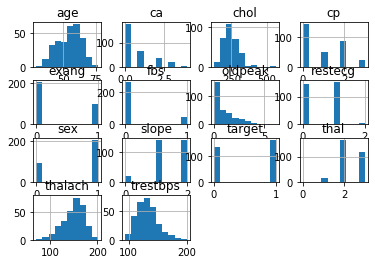

In [23]:
df.hist()
df.corr()


Text(0.5, 1.0, 'Count of each Target Class')

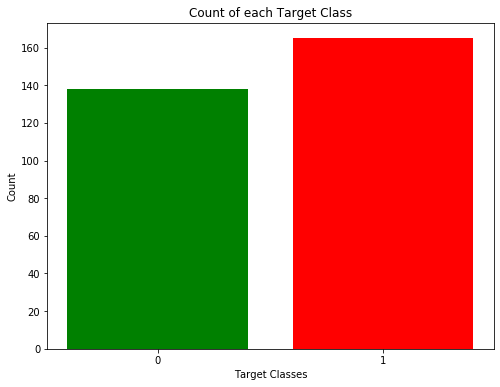

In [24]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [25]:
y=df['target']
X_data=df.drop(['target'],axis=1)

# $Data$  $Preprocessing$



## Data Normalization
![](normalization.png)

In [26]:
#Normalization of data
X=(X_data-np.min(X_data))/(np.max(X_data)-np.min(X_data))

## Splitting of Dataset

In [27]:
#Splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
# Stores the accuracies obtained by employing various ML models
accuracies = {}

### Logistic Regression

In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
chances=(sum(y_pred)/y_pred.size)*100
acc = logreg.score(X_test,y_test)*100 
accuracies['Logistic Regression'] = acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances))
print("Logistic Regression Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 60.66%
Logistic Regression Model Accuracy is 85.25%


### KNN Classifer

TypeError: xticks() takes from 0 to 2 positional arguments but 3 were given

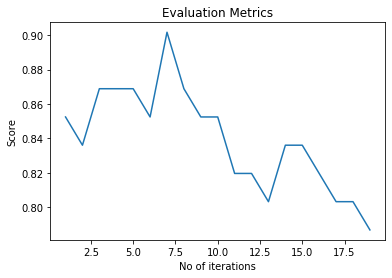

In [46]:
# KNN Classsifier
from sklearn.neighbors import KNeighborsClassifier
score_metrics=[]
chances=[]
iterations=20
for i in range(1,iterations):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    score_metrics.append(knn.score(X_test,y_test))

plt.plot(range(1,iterations),score_metrics)
plt.title("Evaluation Metrics")
plt.xlabel("No of iterations")
plt.ylabel("Score")
plt.xticks(1,iterations,1)
plt.show()



In [47]:
acc=max(score_metrics)*100
max_index = np.argmax(score_metrics)
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
accuracies['KNN']=acc
print("KNN Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 59.02%
KNN Model Accuracy is 90.16%


### SVM

Heart Disease Risk Prediction : 62.30%
SVM Model Accuracy is 83.61%


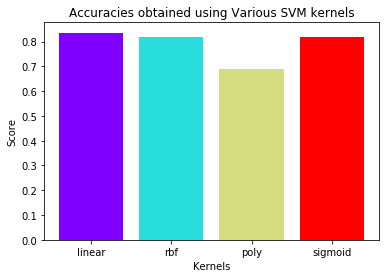

In [48]:
# SVM Classifier using various kernels
kernels=["linear","rbf","poly","sigmoid"]
chances=[]
svc_scores=[]
for i in range (len(kernels)):
    clf=SVC(kernel=kernels[i])
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    svc_scores.append(clf.score(X_test,y_test))

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels,svc_scores,color=colors)
plt.xlabel("Kernels")
plt.ylabel("Score")
plt.title("Accuracies obtained using Various SVM kernels")
acc=max(svc_scores)*100
max_index = np.argmax(svc_scores)
accuracies['SVM']=acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
print("SVM Model Accuracy is {:.2f}%".format(acc))

### Naive Bayes



In [38]:
# Naive Bayes
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred=nb_classifier.predict(X_test)
chances=(sum(y_pred)/y_pred.size)*100
acc=nb_classifier.score(X_test,y_test)*100
accuracies['Naive Bayes']=acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances))
print("SVM Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 60.66%
SVM Model Accuracy is 85.25%


### Decision Trees

## Horse Race of ML Models

<BarContainer object of 4 artists>

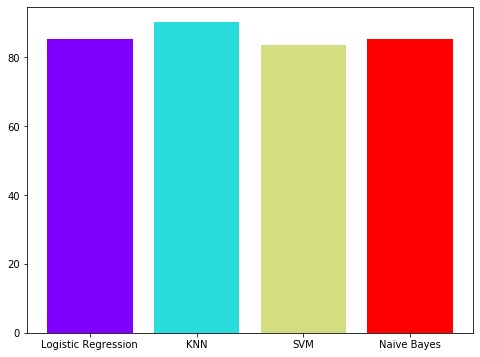

In [39]:
model=accuracies.keys()
score=accuracies.values()
colors = rainbow(np.linspace(0, 1, len(model)))
plt.bar(model,score,color=colors)